In [ ]:
!pip install -U vnstock


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
## Có thể gọi các class chi tiết trong thư viện thay vì sử dụng cấp cao nhất là Vnstock
from vnstock import Vnstock
from vnstock import Listing, Quote, Company, Finance, Trading, Screener

In [14]:
stocks=['FPT','SSI']

In [15]:
import pandas as pd
import os
from datetime import datetime

# ============================================================
# KIỂM TRA KẾT NỐI VÀ THƯ VIỆN VNSTOCK
# ============================================================

print("🔧 KIỂM TRA THƯ VIỆN VNSTOCK")
print("="*50)

try:
    # Kiểm tra version vnstock
    import vnstock
    print(f"✅ Thư viện vnstock version: {vnstock.__version__}")

    # Kiểm tra kết nối với VCI
    print("\n🔍 Kiểm tra kết nối với nguồn VCI...")
    listing = Listing()
    all_symbols = listing.all_symbols()
    print(f"✅ Kết nối VCI thành công! Số mã cổ phiếu: {len(all_symbols)}")

    # Kiểm tra xem các mã trong stocks có tồn tại không
    print(f"\n📊 Kiểm tra mã cổ phiếu: {stocks}")
    for stock in stocks:
        if stock in all_symbols:
            print(f"   ✅ {stock}: Tồn tại")
        else:
            print(f"   ⚠️  {stock}: Không tìm thấy trong danh sách (có thể là mã mới/chưa niêm yết)")

    print("\n🚀 Tất cả kiểm tra thành công! Sẵn sàng tải dữ liệu.")

except Exception as e:
    print(f"❌ Lỗi khi kiểm tra thư viện: {str(e)}")
    print("💡 Có thể cần:")
    print("   - Cài đặt lại thư viện: !pip install -U vnstock")
    print("   - Kiểm tra kết nối internet")
    print("   - Thử lại sau vài phút")

print("\n" + "="*50)

# Tạo thư mục data nếu chưa có
if not os.path.exists('data'):
    os.makedirs('data')

print("🚀 BẮT ĐẦU LẤY DỮ LIỆU OHLCV CHO CÁC CỔ PHIẾU")
print("="*60)

# Thiết lập khoảng thời gian
start_date = "2013-01-01"
end_date = "2024-12-31"

print(f"📅 Khoảng thời gian: {start_date} đến {end_date}")
print(f"📊 Các mã cổ phiếu: {stocks}")
print("-"*60)

# Lấy dữ liệu cho từng cổ phiếu
for stock in stocks:
    try:
        print(f"\n📈 Đang lấy dữ liệu cho cổ phiếu {stock}...")

        # Khởi tạo đối tượng Quote cho cổ phiếu (đúng cách để lấy dữ liệu lịch sử)
        quote = Quote(symbol=stock, source='VCI')

        # Lấy dữ liệu lịch sử OHLCV với interval 1D (1 ngày)
        df = quote.history(start=start_date, end=end_date, interval='1D')

        # Kiểm tra dữ liệu
        if df is not None and not df.empty:
            print(f"✅ Đã lấy được {len(df)} dòng dữ liệu cho {stock}")
            print(f"   📅 Từ ngày: {df['time'].min()} đến {df['time'].max()}")

            # Hiển thị thông tin cơ bản
            print(f"   📊 Cột dữ liệu: {list(df.columns)}")
            print(f"   💰 Giá đóng cửa cao nhất: {df['close'].max():.2f}")
            print(f"   💰 Giá đóng cửa thấp nhất: {df['close'].min():.2f}")
            print(f"   📊 Khối lượng giao dịch trung bình: {df['volume'].mean():.0f}")

            # Lưu dữ liệu vào file CSV
            filename = f"data/{stock}_detail_{start_date.replace('-', '_')}_{end_date.replace('-', '_')}.csv"
            df.to_csv(filename, index=False)
            print(f"💾 Đã lưu dữ liệu vào file: {filename}")

        else:
            print(f"❌ Không thể lấy dữ liệu cho cổ phiếu {stock}")
            print("   💡 Thử với nguồn dữ liệu khác (TCBS)...")
            # Thử với nguồn TCBS nếu VCI không hoạt động
            try:
                quote_tcbs = Quote(symbol=stock, source='TCBS')
                df_tcbs = quote_tcbs.history(start=start_date, end=end_date, interval='1D')
                if df_tcbs is not None and not df_tcbs.empty:
                    print(f"   ✅ Thành công với nguồn TCBS: {len(df_tcbs)} dòng dữ liệu")
                    df = df_tcbs
                    # Lưu dữ liệu
                    filename = f"data/{stock}_detail_{start_date.replace('-', '_')}_{end_date.replace('-', '_')}.csv"
                    df.to_csv(filename, index=False)
                    print(f"   💾 Đã lưu dữ liệu vào file: {filename}")
                else:
                    print(f"   ❌ Cả VCI và TCBS đều không có dữ liệu cho {stock}")
            except Exception as e2:
                print(f"   ❌ Lỗi với nguồn TCBS: {str(e2)}")

    except Exception as e:
        print(f"❌ Lỗi khi lấy dữ liệu cho cổ phiếu {stock}: {str(e)}")
        print("   💡 Nguyên nhân có thể:")
        print("      - Mã cổ phiếu không tồn tại")
        print("      - Dữ liệu không có trong khoảng thời gian này")
        print("      - Vấn đề kết nối mạng hoặc API")

print("\n" + "="*60)
print("🎉 HOÀN THÀNH LẤY DỮ LIỆU!")
print("="*60)

# Hiển thị tóm tắt
print("\n📋 TÓM TẮT DỮ LIỆU:")
print("-"*40)

for stock in stocks:
    filename = f"data/{stock}_detail_{start_date.replace('-', '_')}_{end_date.replace('-', '_')}.csv"
    if os.path.exists(filename):
        df_check = pd.read_csv(filename)
        print(f"📊 {stock}: {len(df_check)} dòng dữ liệu")
        print(f"   📁 File: {filename}")
    else:
        print(f"❌ {stock}: Không có file dữ liệu")

print("\n💡 Gợi ý:")
print("- Kiểm tra thư mục 'data/' để xem các file CSV đã được tạo")
print("- Mỗi file chứa dữ liệu OHLCV (Open, High, Low, Close, Volume)")
print("- Có thể sử dụng dữ liệu này cho phân tích kỹ thuật hoặc mô hình ML")

🔧 KIỂM TRA THƯ VIỆN VNSTOCK
❌ Lỗi khi kiểm tra thư viện: module 'vnstock' has no attribute '__version__'
💡 Có thể cần:
   - Cài đặt lại thư viện: !pip install -U vnstock
   - Kiểm tra kết nối internet
   - Thử lại sau vài phút

🚀 BẮT ĐẦU LẤY DỮ LIỆU OHLCV CHO CÁC CỔ PHIẾU
📅 Khoảng thời gian: 2013-01-01 đến 2024-12-31
📊 Các mã cổ phiếu: ['FPT', 'SSI']
------------------------------------------------------------

📈 Đang lấy dữ liệu cho cổ phiếu FPT...
✅ Đã lấy được 3133 dòng dữ liệu cho FPT
   📅 Từ ngày: 2012-06-20 00:00:00 đến 2024-12-31 00:00:00
   📊 Cột dữ liệu: ['time', 'open', 'high', 'low', 'close', 'volume']
   💰 Giá đóng cửa cao nhất: 131.49
   💰 Giá đóng cửa thấp nhất: 3.57
   📊 Khối lượng giao dịch trung bình: 1441355
💾 Đã lưu dữ liệu vào file: data/FPT_detail_2013_01_01_2024_12_31.csv

📈 Đang lấy dữ liệu cho cổ phiếu SSI...
✅ Đã lấy được 3133 dòng dữ liệu cho FPT
   📅 Từ ngày: 2012-06-20 00:00:00 đến 2024-12-31 00:00:00
   📊 Cột dữ liệu: ['time', 'open', 'high', 'low', 'close'

In [18]:
# ============================================================
# KIỂM TRA KẾT NỐI VÀ THƯ VIỆN VNSTOCK
# ============================================================

print("🔧 KIỂM TRA THƯ VIỆN VNSTOCK")
print("="*50)

try:
    # Kiểm tra version vnstock
    import vnstock
    print(f"✅ Thư viện vnstock version: {vnstock.__version__}")

    # Kiểm tra kết nối với VCI
    print("\n🔍 Kiểm tra kết nối với nguồn VCI...")
    listing = Listing()
    all_symbols = listing.all_symbols()
    print(f"✅ Kết nối VCI thành công! Số mã cổ phiếu: {len(all_symbols)}")

    # Kiểm tra xem các mã trong stocks có tồn tại không
    print(f"\n📊 Kiểm tra mã cổ phiếu: {stocks}")
    for stock in stocks:
        if stock in all_symbols:
            print(f"   ✅ {stock}: Tồn tại")
        else:
            print(f"   ⚠️  {stock}: Không tìm thấy trong danh sách (có thể là mã mới/chưa niêm yết)")

    print("\n🚀 Tất cả kiểm tra thành công! Sẵn sàng tải dữ liệu.")

except Exception as e:
    print(f"❌ Lỗi khi kiểm tra thư viện: {str(e)}")
    print("💡 Có thể cần:")
    print("   - Cài đặt lại thư viện: !pip install -U vnstock")
    print("   - Kiểm tra kết nối internet")
    print("   - Thử lại sau vài phút")

print("\n" + "="*50)

🔧 KIỂM TRA THƯ VIỆN VNSTOCK
❌ Lỗi khi kiểm tra thư viện: module 'vnstock' has no attribute '__version__'
💡 Có thể cần:
   - Cài đặt lại thư viện: !pip install -U vnstock
   - Kiểm tra kết nối internet
   - Thử lại sau vài phút



🔍 KIỂM TRA DỮ LIỆU ĐÃ TẢI

📊 CỔ PHIẾU FPT:
------------------------------
📁 File: data/FPT_detail_2013_01_01_2024_12_31.csv
📈 Số dòng dữ liệu: 3133
📅 Khoảng thời gian: 2012-06-20 → 2024-12-31
📋 Cột dữ liệu: ['time', 'open', 'high', 'low', 'close', 'volume']

💰 THỐNG KÊ GIÁ:
   • Giá mở cửa cao nhất: 130.97
   • Giá đóng cửa cao nhất: 131.49
   • Giá cao nhất (trong ngày): 132.69
   • Giá thấp nhất (trong ngày): 3.53
   • Giá đóng cửa trung bình: 27.97

📊 THỐNG KÊ KHỐI LƯỢNG:
   • Khối lượng giao dịch cao nhất: 13,723,703
   • Khối lượng giao dịch trung bình: 1,441,355
   • Tổng khối lượng: 4,515,766,327

📋 5 DÒNG ĐẦU TIÊN:
      time  open  high  low  close  volume
2012-06-20  5.31  5.31 5.27   5.29   89720
2012-06-21  5.28  5.29 5.26   5.28   50360
2012-06-22  5.27  5.28 5.26   5.26   67350
2012-06-25  5.25  5.29 5.25   5.26   42840
2012-06-26  5.22  5.24 5.22   5.22   31110

📋 5 DÒNG CUỐI CÙNG:
      time   open   high    low  close  volume
2024-12-25 129.85 130.37 129.68 130.02 2517

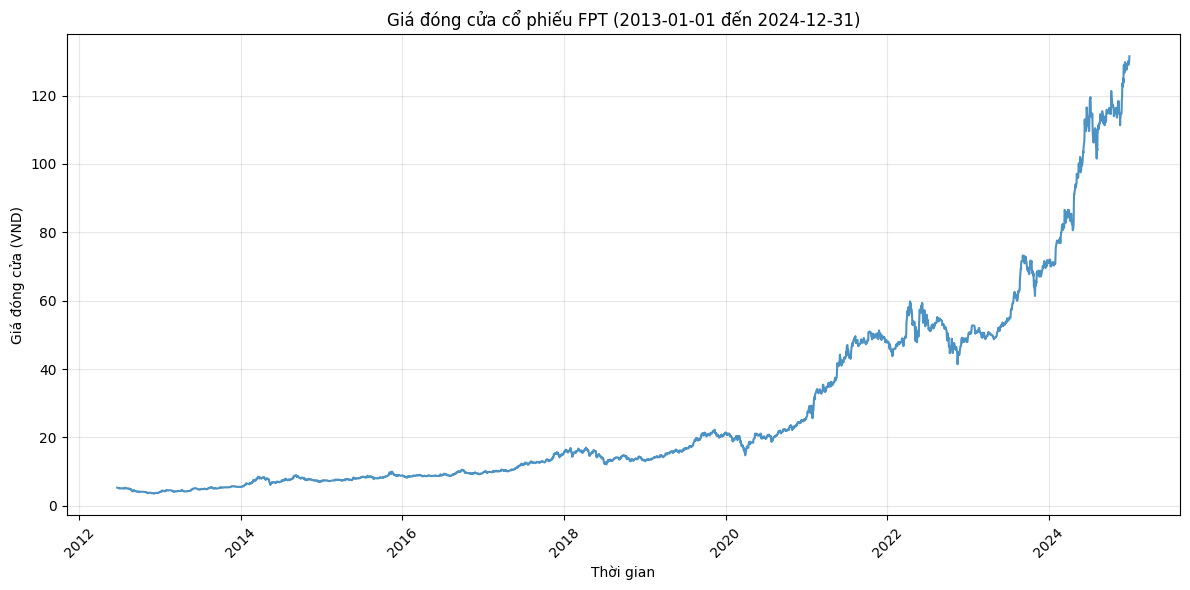

📈 Biểu đồ đã lưu: data/FPT_price_chart.png

📊 CỔ PHIẾU SSI:
------------------------------
📁 File: data/SSI_detail_2013_01_01_2024_12_31.csv
📈 Số dòng dữ liệu: 3133
📅 Khoảng thời gian: 2012-06-20 → 2024-12-31
📋 Cột dữ liệu: ['time', 'open', 'high', 'low', 'close', 'volume']

💰 THỐNG KÊ GIÁ:
   • Giá mở cửa cao nhất: 37.59
   • Giá đóng cửa cao nhất: 36.99
   • Giá cao nhất (trong ngày): 38.18
   • Giá thấp nhất (trong ngày): 2.96
   • Giá đóng cửa trung bình: 11.76

📊 THỐNG KÊ KHỐI LƯỢNG:
   • Khối lượng giao dịch cao nhất: 69,569,414
   • Khối lượng giao dịch trung bình: 7,386,492
   • Tổng khối lượng: 23,141,879,346

📋 5 DÒNG ĐẦU TIÊN:
      time  open  high  low  close  volume
2012-06-20  4.38  4.43 4.34   4.38 1036710
2012-06-21  4.34  4.41 4.34   4.34  617320
2012-06-22  4.32  4.36 4.26   4.34 1620950
2012-06-25  4.34  4.34 4.22   4.26 1565690
2012-06-26  4.22  4.22 4.12   4.12 1862410

📋 5 DÒNG CUỐI CÙNG:
      time  open  high   low  close   volume
2024-12-25 25.36 26.09 25.26  

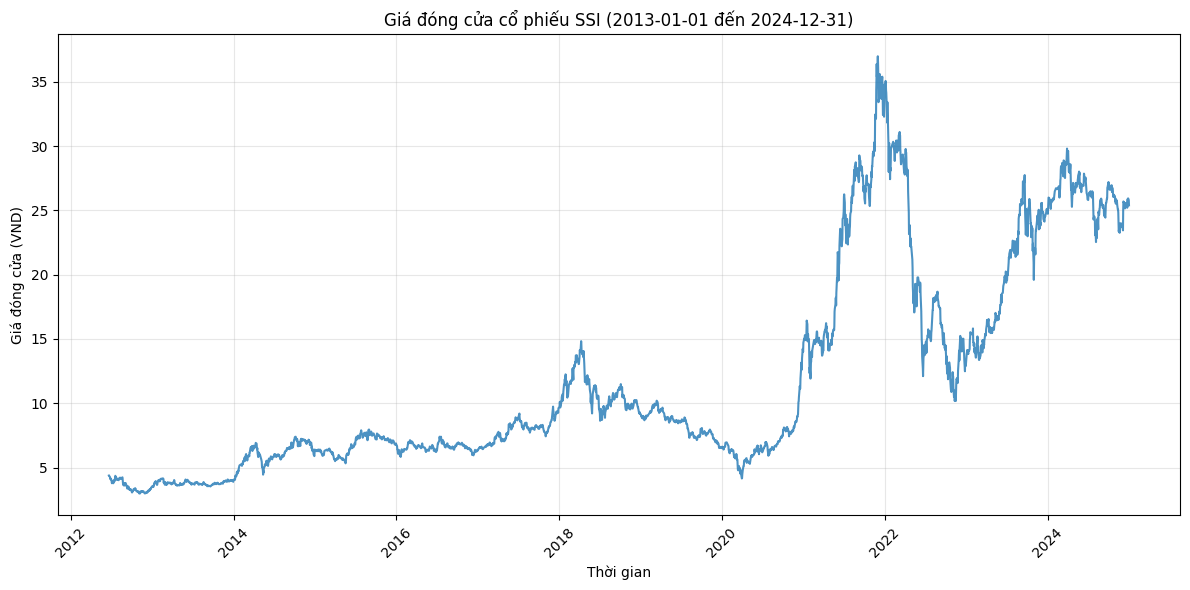

📈 Biểu đồ đã lưu: data/SSI_price_chart.png

✅ HOÀN THÀNH KIỂM TRA DỮ LIỆU!

💡 TÓM TẮT:
- Các file CSV đã được lưu trong thư mục 'data/'
- Mỗi file chứa dữ liệu OHLCV đầy đủ
- Có thể sử dụng dữ liệu này cho:
  • Phân tích kỹ thuật
  • Mô hình Machine Learning
  • Backtesting chiến lược giao dịch
  • Phân tích rủi ro và lợi nhuận


In [19]:
# ============================================================
# KIỂM TRA VÀ HIỂN THỊ DỮ LIỆU ĐÃ TẢI
# ============================================================

print("🔍 KIỂM TRA DỮ LIỆU ĐÃ TẢI")
print("="*50)

import matplotlib.pyplot as plt

for stock in stocks:
    filename = f"data/{stock}_detail_{start_date.replace('-', '_')}_{end_date.replace('-', '_')}.csv"

    if os.path.exists(filename):
        try:
            # Đọc dữ liệu
            df = pd.read_csv(filename)

            print(f"\n📊 CỔ PHIẾU {stock}:")
            print("-"*30)
            print(f"📁 File: {filename}")
            print(f"📈 Số dòng dữ liệu: {len(df)}")
            print(f"📅 Khoảng thời gian: {df['time'].min()} → {df['time'].max()}")

            # Thông tin về cột
            print(f"📋 Cột dữ liệu: {list(df.columns)}")

            # Thống kê giá
            print("\n💰 THỐNG KÊ GIÁ:")
            print(f"   • Giá mở cửa cao nhất: {df['open'].max():.2f}")
            print(f"   • Giá đóng cửa cao nhất: {df['close'].max():.2f}")
            print(f"   • Giá cao nhất (trong ngày): {df['high'].max():.2f}")
            print(f"   • Giá thấp nhất (trong ngày): {df['low'].min():.2f}")
            print(f"   • Giá đóng cửa trung bình: {df['close'].mean():.2f}")

            # Thống kê khối lượng
            print("\n📊 THỐNG KÊ KHỐI LƯỢNG:")
            print(f"   • Khối lượng giao dịch cao nhất: {df['volume'].max():,.0f}")
            print(f"   • Khối lượng giao dịch trung bình: {df['volume'].mean():,.0f}")
            print(f"   • Tổng khối lượng: {df['volume'].sum():,.0f}")

            # Hiển thị 5 dòng đầu và cuối
            print("\n📋 5 DÒNG ĐẦU TIÊN:")
            print(df.head().to_string(index=False))

            print("\n📋 5 DÒNG CUỐI CÙNG:")
            print(df.tail().to_string(index=False))

            # Vẽ biểu đồ giá đóng cửa
            plt.figure(figsize=(12, 6))
            plt.plot(pd.to_datetime(df['time']), df['close'], linewidth=1.5, alpha=0.8)
            plt.title(f'Giá đóng cửa cổ phiếu {stock} ({start_date} đến {end_date})')
            plt.xlabel('Thời gian')
            plt.ylabel('Giá đóng cửa (VND)')
            plt.grid(True, alpha=0.3)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.savefig(f'data/{stock}_price_chart.png', dpi=300, bbox_inches='tight')
            plt.show()

            print(f"📈 Biểu đồ đã lưu: data/{stock}_price_chart.png")

        except Exception as e:
            print(f"❌ Lỗi khi đọc file {filename}: {str(e)}")
    else:
        print(f"❌ File không tồn tại: {filename}")

print("\n" + "="*50)
print("✅ HOÀN THÀNH KIỂM TRA DỮ LIỆU!")
print("="*50)

print("\n💡 TÓM TẮT:")
print("- Các file CSV đã được lưu trong thư mục 'data/'")
print("- Mỗi file chứa dữ liệu OHLCV đầy đủ")
print("- Có thể sử dụng dữ liệu này cho:")
print("  • Phân tích kỹ thuật")
print("  • Mô hình Machine Learning")
print("  • Backtesting chiến lược giao dịch")
print("  • Phân tích rủi ro và lợi nhuận")

In [20]:
# ============================================================
# KIỂM TRA TÍNH ĐẦY ĐỦ DỮ LIỆU THEO NGÀY
# ============================================================

print("📅 KIỂM TRA TÍNH ĐẦY ĐỦ DỮ LIỆU")
print("="*50)

from datetime import datetime, timedelta

# Tạo danh sách tất cả các ngày trong khoảng thời gian
start = pd.to_datetime(start_date)
end = pd.to_datetime(end_date)
all_dates = pd.date_range(start=start, end=end, freq='D')
expected_days = len(all_dates)

print(f"📊 Kỳ vọng: {expected_days} ngày ({start_date} → {end_date})")
print(f"📅 Bao gồm: {expected_days} ngày làm việc + ngày nghỉ")

for stock in stocks:
    filename = f"data/{stock}_detail_{start_date.replace('-', '_')}_{end_date.replace('-', '_')}.csv"

    if os.path.exists(filename):
        df = pd.read_csv(filename)
        df['time'] = pd.to_datetime(df['time'])
        actual_days = len(df)

        # Tìm các ngày bị thiếu
        data_dates = set(df['time'].dt.date)
        all_date_set = set(all_dates.date)
        missing_dates = all_date_set - data_dates

        print(f"\n📈 {stock}:")
        print(f"   ✅ Có dữ liệu: {actual_days} ngày")
        print(f"   ❌ Thiếu dữ liệu: {len(missing_dates)} ngày")
        print(f"   📊 Tỷ lệ đầy đủ: {actual_days/expected_days*100:.1f}%")

        if len(missing_dates) > 0 and len(missing_dates) <= 10:
            print(f"   📋 Ngày thiếu: {sorted(list(missing_dates))[:5]}..." if len(missing_dates) > 5 else f"   📋 Ngày thiếu: {sorted(list(missing_dates))}")
        elif len(missing_dates) > 10:
            print(f"   📋 {len(missing_dates)} ngày thiếu (quá nhiều để hiển thị)")

print("\n" + "="*50)
print("✅ HOÀN THÀNH KIỂM TRA TÍNH ĐẦY ĐỦ!")
print("="*50)

📅 KIỂM TRA TÍNH ĐẦY ĐỦ DỮ LIỆU
📊 Kỳ vọng: 4383 ngày (2013-01-01 → 2024-12-31)
📅 Bao gồm: 4383 ngày làm việc + ngày nghỉ

📈 FPT:
   ✅ Có dữ liệu: 3133 ngày
   ❌ Thiếu dữ liệu: 1387 ngày
   📊 Tỷ lệ đầy đủ: 71.5%
   📋 1387 ngày thiếu (quá nhiều để hiển thị)

📈 SSI:
   ✅ Có dữ liệu: 3133 ngày
   ❌ Thiếu dữ liệu: 1387 ngày
   📊 Tỷ lệ đầy đủ: 71.5%
   📋 1387 ngày thiếu (quá nhiều để hiển thị)

✅ HOÀN THÀNH KIỂM TRA TÍNH ĐẦY ĐỦ!


In [21]:
# ============================================================
# SO SÁNH DỮ LIỆU GIỮA CÁC CỔ PHIẾU THEO NGÀY
# ============================================================

print("🔄 SO SÁNH DỮ LIỆU THEO NGÀY")
print("="*50)

# Đọc dữ liệu của tất cả cổ phiếu
stock_data = {}
for stock in stocks:
    filename = f"data/{stock}_detail_{start_date.replace('-', '_')}_{end_date.replace('-', '_')}.csv"
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        df['time'] = pd.to_datetime(df['time'])
        stock_data[stock] = set(df['time'].dt.date)

# Tìm ngày chung và ngày riêng biệt
if len(stock_data) >= 2:
    common_dates = set.intersection(*stock_data.values())
    all_dates = set.union(*stock_data.values())

    print(f"📊 Tổng quan:")
    print(f"   📅 Ngày có dữ liệu của ít nhất 1 cổ phiếu: {len(all_dates)}")
    print(f"   ✅ Ngày có dữ liệu của tất cả cổ phiếu: {len(common_dates)}")
    print(f"   📊 Tỷ lệ ngày chung: {len(common_dates)/len(all_dates)*100:.1f}%")

    print(f"\n📈 Chi tiết từng cổ phiếu:")
    for stock, dates in stock_data.items():
        unique_dates = dates - common_dates
        print(f"   {stock}: {len(dates)} ngày ({len(unique_dates)} ngày riêng biệt)")

    # Tìm các ngày không đồng nhất
    inconsistent_dates = []
    for date in all_dates:
        stocks_on_date = [stock for stock, dates in stock_data.items() if date in dates]
        if len(stocks_on_date) != len(stocks):
            inconsistent_dates.append((date, stocks_on_date))

    if inconsistent_dates:
        print(f"\n⚠️  Ngày không đồng nhất: {len(inconsistent_dates)}")
        for date, available_stocks in sorted(inconsistent_dates)[:10]:  # Hiển thị 10 ngày đầu
            missing_stocks = [s for s in stocks if s not in available_stocks]
            print(f"   {date}: Có {available_stocks} → Thiếu {missing_stocks}")
        if len(inconsistent_dates) > 10:
            print(f"   ... và {len(inconsistent_dates)-10} ngày khác")
    else:
        print(f"\n✅ Tất cả ngày đều đồng nhất giữa các cổ phiếu!")

print("\n" + "="*50)
print("✅ HOÀN THÀNH SO SÁNH!")
print("="*50)

🔄 SO SÁNH DỮ LIỆU THEO NGÀY
📊 Tổng quan:
   📅 Ngày có dữ liệu của ít nhất 1 cổ phiếu: 3133
   ✅ Ngày có dữ liệu của tất cả cổ phiếu: 3133
   📊 Tỷ lệ ngày chung: 100.0%

📈 Chi tiết từng cổ phiếu:
   FPT: 3133 ngày (0 ngày riêng biệt)
   SSI: 3133 ngày (0 ngày riêng biệt)

✅ Tất cả ngày đều đồng nhất giữa các cổ phiếu!

✅ HOÀN THÀNH SO SÁNH!
